We are given a titanic dataset and based on other datas given we have to predict whether Survived or not.
For that we are proceeding in the following order
1.Importing necessary libraries
2.Reading the dataset
3.Doing exploratory data analysis
4.Preprocessing of data
5.Making kNN and SVM model based on our cleaned dataset and measuring its accuracy
6.Crossvalidation to be done using KFold and StratifiedKFold

In [165]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
#Reading the data

titanic=pd.read_csv('titanic_dataset.csv')

In [167]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
#Since Passenger iD,Name and Ticket dont have any effect,we can drop these 2 columns 
titanic.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

From the above information we can classify titanic data set in to columns with numerical values and character

In [170]:
numerical_cols = titanic.select_dtypes(include=['number']).columns
categorical_cols =titanic.select_dtypes(include=['object']).columns

In [171]:
categorical_cols

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [172]:
numerical_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

For EDA we will do seperately for numerical and character columns.For that we will first consider dataframe with numerical value columns

In [173]:
# Titanic dataset with numerical columns only
num_titanic=titanic.drop(categorical_cols,axis=1)

In [174]:
num_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


To see the effect of each numerical columns on Survived we will use groupby

In [175]:
num_titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [176]:
# From the above result,we can see column 'Fare' has significat contribution in prediction of 'Survived'

In [177]:
num_titanic.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

There are 177 null values in 'Age' column.We need to check whether age value is missing randomly or in a manner.For that we have to check its relation with other variables

In [178]:
num_titanic.groupby(num_titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [179]:
#From the above result we can see that factors Fare and SibSp and Parch has effect on age missing values

Plot histogram to show the effect of Age and Fare in Survived column
Plot  histogram for Pclass ,SibSp and Parch seperately as they are having ordinal values

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\3055332565.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died,color='r',bins=np.arange(xmin,xmax,width))
C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\3055332565.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived,color='g'

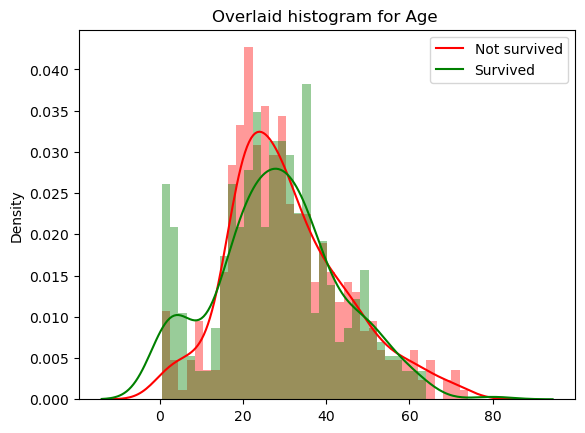

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\3055332565.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died,color='r',bins=np.arange(xmin,xmax,width))
C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\3055332565.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived,color='g'

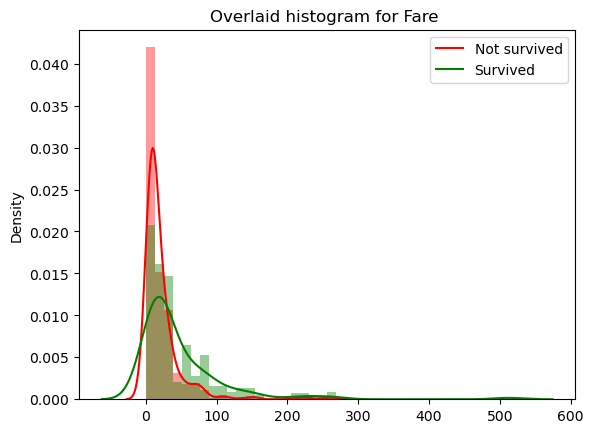

In [180]:
for i in ['Age','Fare']:
    died=list(num_titanic[num_titanic['Survived']==0][i].dropna())
    survived=list(num_titanic[num_titanic['Survived']==1][i].dropna())
    xmin=min(min(died),min(survived))
    xmax=max(max(died),max(survived))
    width=(xmax-xmin)/40
    sns.distplot(died,color='r',bins=np.arange(xmin,xmax,width))
    sns.distplot(survived,color='g',bins=np.arange(xmin,xmax,width))
    plt.legend(['Not survived','Survived'])
    plt.title(f'Overlaid histogram for {i} ')
    plt.show()
    

From the above plots we can infer that Survived column value is distributed for all ages.But in plot of fare,we can infer those who paid higher fare had more probability of Survived 

<Figure size 640x480 with 0 Axes>

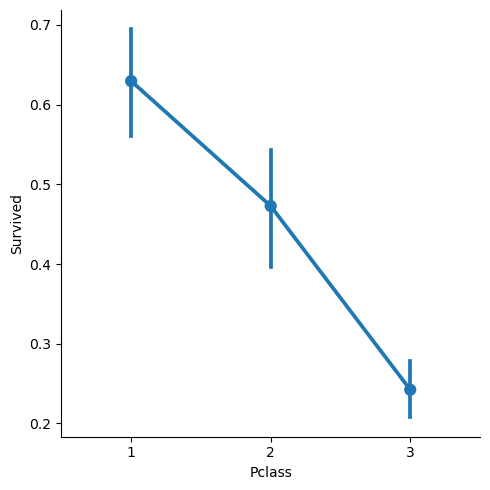

<Figure size 640x480 with 0 Axes>

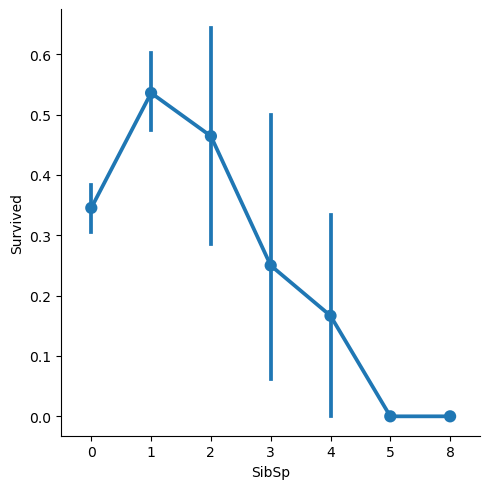

<Figure size 640x480 with 0 Axes>

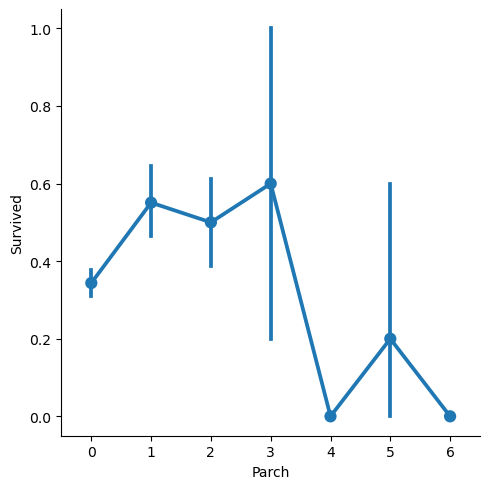

In [181]:
#Now consider the columns having ordinal values
for i,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure()
    sns.catplot(x=col,y='Survived',data=num_titanic,kind='point')

From above plots,we infer those who travelled in better clas had more probabilty of survival
Also Parch and SibSp can be combined to form a single column,family count

In [182]:
num_titanic['family_cnt']=num_titanic['SibSp']+num_titanic['Parch']
num_titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

In [183]:
num_titanic.head()

,Survived,Pclass,Age,Fare,family_cnt
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


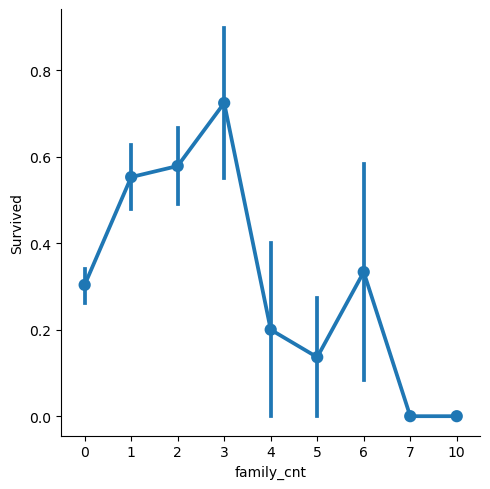

In [184]:
sns.catplot(x='family_cnt',y='Survived',data=num_titanic,kind='point')

In [185]:
#More people in family less chance to survive

Above conclusions made from numerical dataframe can be implemented in our main dataset,titanic

1.We will fill null values of Age column based on SibSp and Parcc column and their median
2.We will combine parch and SibSp columns int one column famil_cnt and drop the other 2

In [186]:
null_loc=titanic['Age'][titanic['Age'].isnull()].index
for i in null_loc:
    age_fill=titanic['Age'][(titanic['SibSp']==titanic.iloc[i]['SibSp'])&(titanic['Pclass']==titanic.iloc[i]['Pclass'])].median()
    if not np.isnan(age_fill):
        titanic['Age'].iloc[i]=age_fill
    else:
        titanic['Age'].iloc[i]=titanic['Age'].median()

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\537703536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'].iloc[i]=age_fill
C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\537703536.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age'].iloc[i]=titanic['Age'].median()


In [187]:
titanic['family_cnt']=titanic['SibSp']+titanic['Parch']
titanic.drop(['SibSp','Parch'],axis=1,inplace=True)

Now we are going to consider titanic dataframe with character entries

In [188]:
cat_titanic=titanic[categorical_cols]

In [189]:
# Add Survived column to this dataframe to find realtion with other category columns
cat_titanic['Survived']=titanic['Survived']
cat_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Cabin     204 non-null    object
 2   Embarked  889 non-null    object
 3   Survived  891 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\468547657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_titanic['Survived']=titanic['Survived']


Cabin column has large number of null values.Before dropping we have to see whether avaialbility of cabin information has any effect on 'Survived' column.For that we use groupby()

In [190]:
cat_titanic.groupby(cat_titanic['Cabin'].isnull()).mean()

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\1902448304.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_titanic.groupby(cat_titanic['Cabin'].isnull()).mean()


,Survived
Cabin,
False,0.666667
True,0.299854


From above result we can infer 66% of those who had cabin information survived
So we can add another column ,'cabin_ind', which indicates whether cabin information is avaialble or not

In [191]:
# Also drop cabin column 
cat_titanic['cabin_ind']=np.where(cat_titanic['Cabin'].isnull(),0,1)
cat_titanic.drop('Cabin',axis=1,inplace=True)
cat_titanic.head()

C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\2600936244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_titanic['cabin_ind']=np.where(cat_titanic['Cabin'].isnull(),0,1)
C:\Users\Sunitha\AppData\Local\Temp\ipykernel_16656\2600936244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_titanic.drop('Cabin',axis=1,inplace=True)


,Sex,Embarked,Survived,cabin_ind
0,male,S,0,0
1,female,C,1,1
2,female,S,1,0
3,female,S,1,1
4,male,S,0,0


Now we can plot the category variables to show the effect on 'Survived'

<Figure size 640x480 with 0 Axes>

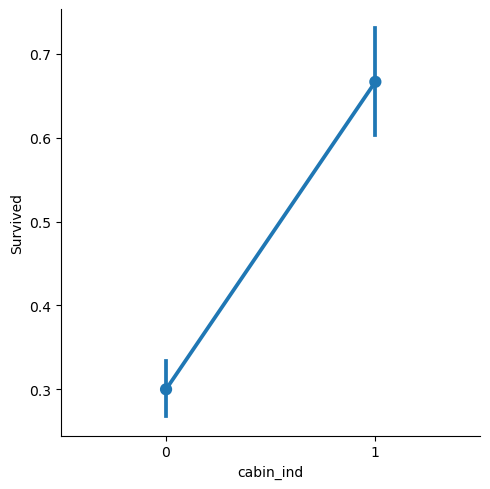

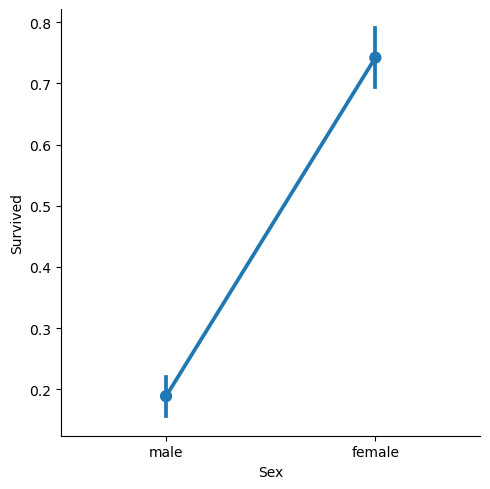

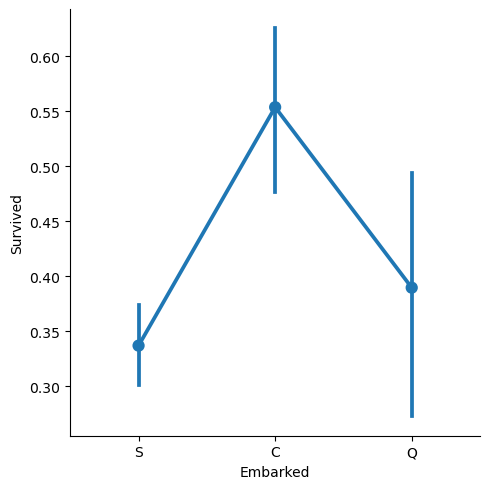

In [192]:
for i,col in enumerate(['cabin_ind','Sex','Embarked']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=cat_titanic,kind='point')

From the plot we can see columns cabin_ind and Sex have effect on Survival.
More than 65% having cabin information survived and more than 70% female survived
But no effect for Embarked column on Survival .so it can be deleted


Applyin the above inferences from categorical dataframe to our main dataset
1.Adding a new column cabin_ind indicationg whether cabin information is avaialble or not and dropping 'Cabin' column
2.Dropping 'Embarked' column from main dataset as we couldnt find any relation with 'Survived' column inplot

In [193]:
titanic['cabin_ind']=np.where(titanic['Cabin'].isnull(),0,1)
titanic.drop(['Cabin','Embarked'],axis=1,inplace=True)

In [194]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,cabin_ind
0,0,3,male,22.0,7.2500,1,0
1,1,1,female,38.0,71.2833,1,1
2,1,3,female,26.0,7.9250,0,0
3,1,1,female,35.0,53.1000,1,1
4,0,3,male,35.0,8.0500,0,0


In [195]:
#Checking for null values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
family_cnt    0
cabin_ind     0
dtype: int64

In [196]:
#Dividing new dataframe in to numerical and categorical columns
numerical_cols = titanic.select_dtypes(include=['number']).columns
categorical_cols =titanic.select_dtypes(include=['object']).columns

Column 'Sex' has got numerical values,SO we have to do encoding
Columns 'Age' and 'Fare' has got different range of values,so we have to do scaling

In [197]:
# label encoding for converting Sex column in to numerical values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in categorical_cols:
    titanic[col]=encoder.fit_transform(titanic[col])

In [198]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,cabin_ind
0,0,3,1,22.0,7.2500,1,0
1,1,1,0,38.0,71.2833,1,1
2,1,3,0,26.0,7.9250,0,0
3,1,1,0,35.0,53.1000,1,1
4,0,3,1,35.0,8.0500,0,0


In [199]:
#Standard scaling done for scaling values of Age and Fare
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
titanic[['Age','Fare']]=scaler.fit_transform(titanic[['Age','Fare']])
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,cabin_ind
0,0,3,1,-0.548896,-0.502445,1,0
1,1,1,0,0.658736,0.786845,1,1
2,1,3,0,-0.246988,-0.488854,0,0
3,1,1,0,0.432305,0.420730,1,1
4,0,3,1,0.432305,-0.486337,0,0


Our dataset is now analysed and cleaned.Now features and target variable is assigned
'Survived' is our target variable to be predicted
We will create 2 dataframes with labels and target variables

In [200]:
#x for labels and y for predicted variable
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']

Now split data in to traing set and testing set.20% of data is kept for testing

In [201]:
#Splitting of dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

After testing,we are going to make 2 models
1.kNN 
2.SVM


1.kNN
For that we assume values of number of neighborsis taken  from 3 to 15 and do test and one with best accuracy is taken.

In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=4)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [203]:
metric_k

[0.7932960893854749,
 0.8212290502793296,
 0.7932960893854749,
 0.7877094972067039,
 0.8100558659217877,
 0.7877094972067039,
 0.8044692737430168,
 0.7932960893854749,
 0.8100558659217877,
 0.7988826815642458,
 0.8324022346368715,
 0.8044692737430168]

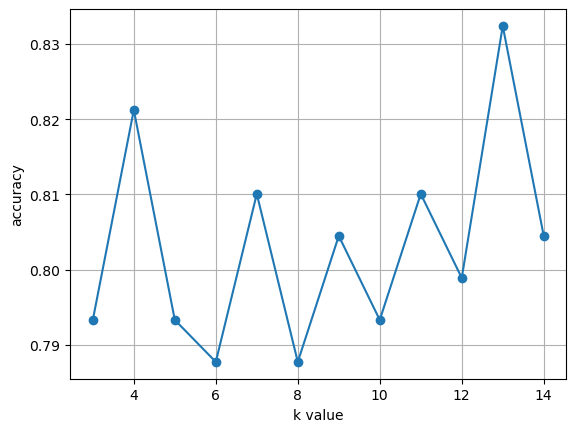

In [204]:
#Plotting accuracy with n
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

n value of 13 found to be more accurate

In [205]:
#kNN model with no of neighbors=13
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski',p=4)
model_KNN=classifier.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

Evaluating metrics for the model

In [206]:
print('Accuracy is', accuracy_score(y_test, y_pred)) 
print('Precision is', precision_score(y_test, y_pred)) 
print('Recall is', recall_score(y_test, y_pred)) 
print('f1 score is', f1_score(y_test,y_pred)) 


Accuracy is 0.8324022346368715
Precision is 0.8235294117647058
Recall is 0.7567567567567568
f1 score is 0.7887323943661971


In [207]:
confusion_matrix(y_test,y_pred)

array([[93, 12],
       [18, 56]], dtype=int64)

Model using SVM

In [208]:
from sklearn.svm import SVC
sv_clf=SVC()
model_svm=sv_clf.fit(x_train,y_train)
y_pred=model_svm.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

Evaluating metrics of SVM

In [209]:
print('Accuracy is', accuracy_score(y_test, y_pred)) 
print('Precision is', precision_score(y_test, y_pred)) 
print('Recall is', recall_score(y_test, y_pred)) 
print('f1 score is', f1_score(y_test,y_pred)) 

Accuracy is 0.8100558659217877
Precision is 0.803030303030303
Recall is 0.7162162162162162
f1 score is 0.7571428571428571


Next step is cross validation of the 2 models we have created.
We use KFold and StratifiedKFold for each model

Cross validation using KFold

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.model_selection import KFold
kFold_val=KFold(10)
from sklearn.model_selection import train_test_split
for train_index,test_index in kFold_val.split(x,y):
    print('Training index ',train_index)
    print('Test index ',test_index)

Training index  [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [211]:
#Find cross validation score for KNN and SVM model
from sklearn.model_selection import cross_val_score
kv_result_KNNmodel=cross_val_score(model_KNN,x,y,cv=kFold_val)
kv_result_SVMmodel=cross_val_score(model_svm,x,y,cv=kFold_val)

In [212]:
kv_result_KNNmodel
np.mean(kv_result_KNNmodel)

0.7845318352059925

In [213]:
kv_result_SVMmodel
np.mean(kv_result_SVMmodel)

0.8226966292134831

In [214]:
print(f'Cross validation score using KFold for KNN model is {np.mean(kv_result_KNNmodel)} and cross validation score for SVM model is {np.mean(kv_result_SVMmodel)}')

Cross validation score using KFold for KNN model is 0.7845318352059925 and cross validation score for SVM model is 0.8226966292134831


Cross validation of KNN and SVM model using StratifiedKFold

In [215]:
from sklearn.model_selection import StratifiedKFold
sk_fold=StratifiedKFold(10)
skv_result_KNN=cross_val_score(model_KNN,x,y,cv=sk_fold)
skv_result_SVM=cross_val_score(model_svm,x,y,cv=sk_fold)

In [216]:
skv_result_KNN

array([0.76666667, 0.75280899, 0.74157303, 0.78651685, 0.83146067,
       0.74157303, 0.80898876, 0.78651685, 0.84269663, 0.79775281])

In [217]:
np.mean(skv_result_KNN)

0.7856554307116105

In [218]:
np.mean(skv_result_SVM)

0.8215605493133584

In [219]:
print(f'Cross validation score using StratifiedKFold for KNN model is {np.mean(skv_result_KNN)} and cross validation score for SVM model is {np.mean(skv_result_SVM)}')

Cross validation score using StratifiedKFold for KNN model is 0.7856554307116105 and cross validation score for SVM model is 0.8215605493133584


While doing cross validation we got  the follwing score
Using KFold:
KNN mode:0.78
SVM model:0.82
Using StratifiedKFold:
KNN model:0.79
SVM model:0.82

From the above 2 methods ,SVM model found to have more score